In [1]:
from numpy.linalg import eig
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import plotly.express as px


import plotly.io as pio
pio.renderers.default = 'iframe_connected'

In [13]:
# Step-1 : Importing the Dataset
df = pd.read_csv('data cleaning.csv')
print(df.head)


# Step-2 : Standard Scaling
def standardScaler(data):
    '''axis=0 means along the column, axis=1 means working along the row.'''
    scaled_df = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    return scaled_df


scaled_df = standardScaler(df)
scaled_df = np.around(scaled_df, 2)
display(scaled_df)

<bound method NDFrame.head of       Under 5 years  5 to 14 years  65 years and over  \
0              10.5           23.7               27.8   
1              21.9           21.9               31.8   
2               4.8            9.5               17.3   
3               7.7           17.9                6.3   
4               0.0           19.4               30.5   
...             ...            ...                ...   
1020            9.5           19.0               21.8   
1021           10.9           18.2               15.7   
1022            7.2           15.9               21.7   
1023            2.4           13.4               29.3   
1024            5.9            8.9               31.5   

      No certificate, diploma or degree  \
0                                   8.1   
1                                   0.0   
2                                   2.8   
3                                   7.0   
4                                   9.1   
...                        

,Under 5 years,5 to 14 years,65 years and over,"No certificate, diploma or degree","Postsecondary certificate, diploma or degree",No high school diploma or equivalency certificate,Renter,One-maintainer household,Between 7 a.m. and 7:59 a.m.,African American,...,Unemployed,Female employed,Male not in the labour force,All industries,2000 or before,Public transit,Movers,Average number of rooms per dwelling,Major repairs needed,Fountains
0,0.68,1.46,0.32,0.40,0.33,-0.13,-1.02,-0.05,0.21,-0.1,...,0.24,-0.02,0.37,-0.22,0.16,-0.98,-0.04,1.36,0.24,-0.27
1,2.93,1.17,0.65,-0.93,-0.02,0.10,-0.94,-0.19,-0.58,-0.1,...,-0.60,-0.09,-0.21,0.43,0.58,-0.69,-0.10,0.92,0.13,-0.27
2,-0.44,-0.83,-0.57,-0.47,0.45,0.33,-0.52,-0.94,-0.44,-0.1,...,-0.60,0.02,0.14,-0.25,-0.72,0.72,-0.39,0.23,-0.44,-0.27
3,0.13,0.53,-1.50,0.22,0.16,-0.28,1.33,0.65,0.28,-0.1,...,0.85,0.58,-0.80,0.27,-0.79,1.61,1.52,-1.10,0.53,-0.27
4,-1.39,0.77,0.55,0.56,1.14,0.72,-0.25,0.02,-0.20,-0.1,...,0.43,-0.54,0.03,-0.24,0.03,-0.45,0.68,0.61,-0.10,-0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.48,0.70,-0.19,-0.93,-1.67,-1.15,-1.84,0.30,-0.12,-0.1,...,0.24,0.92,0.61,0.43,0.82,-1.48,-0.36,-0.21,0.34,-0.27
1021,0.76,0.58,-0.70,-0.46,-1.33,-0.84,0.33,-0.35,0.22,-0.1,...,0.24,1.03,0.61,0.29,1.11,-0.70,0.19,-0.84,0.89,-0.27
1022,0.03,0.21,-0.20,0.69,1.16,0.94,0.31,-0.70,-0.04,-0.1,...,0.24,-0.24,-0.21,0.18,-0.14,0.47,-1.48,0.10,0.07,0.73
1023,-0.92,-0.20,0.44,0.09,0.86,0.75,-0.47,-0.68,1.17,-0.1,...,0.65,-0.24,0.72,-0.04,-0.08,-0.63,-0.51,0.48,-0.37,-0.27


                                                    Under 5 years  \
Under 5 years                                                1.00   
5 to 14 years                                                0.13   
65 years and over                                           -0.09   
No certificate, diploma or degree                           -0.18   
Postsecondary certificate, diploma or degree                -0.20   
No high school diploma or equivalency certificate           -0.18   
Renter                                                      -0.04   
One-maintainer household                                     0.02   
Between 7 a.m. and 7:59 a.m.                                 0.06   
African American                                             0.03   
South Asian, n.o.s.                                          0.00   
Black, n.o.s.                                                0.03   
Chinese                                                     -0.07   
Filipino                          

<AxesSubplot:>

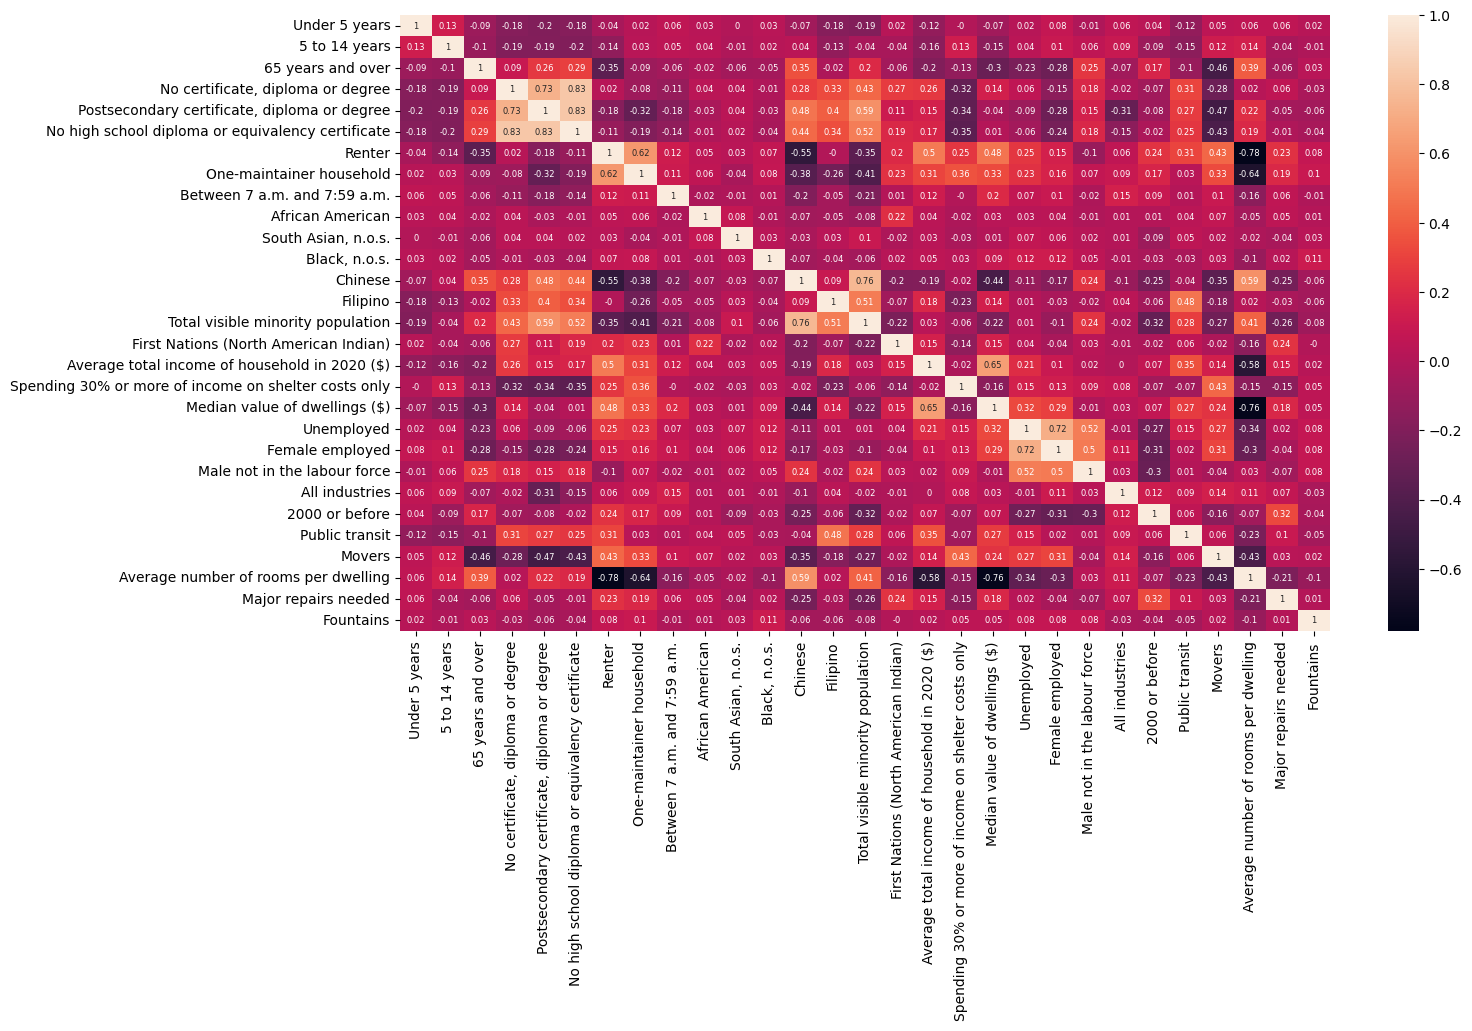

In [3]:
# Step-2 : Computing Covariance Matrix


def computeCovarianceMatrix(data):
    len_data = data.shape[0]
    covariance = data.T.dot(data)/len_data
    return covariance


cov_mat = computeCovarianceMatrix(scaled_df)
cov_mat = np.around(cov_mat, 2)
print(cov_mat)

# Plotting the Covariance Matrix as Heatmap
fig = plt.figure(figsize=(15, 8))
'''Annotate each cell with the numeric value using integer formatting'''
sn.heatmap(cov_mat.round(2), annot=True, fmt='g', annot_kws={"fontsize": 6})
# plt.show()

In [10]:
# Step-3 : Eigen Decomposition of Covariance Matrix
# Check for zero eigenvalues
eig_values, eig_vectors = np.linalg.eig(cov_mat)
if np.any(np.isclose(eig_values, 0)):
    print("Zero eigenvalues found. Handle the condition accordingly.")

print('\nNumber of Eigenvectors : %s ' % len(eig_vectors))
print('\nEigenvectors : \n\n%s' % eig_vectors)
print('\nEigenvalues : \n\n%s' % eig_values)


# Visualize above eigenvectors as a dataframe (or coefficient matrix)
eigenvec_df = pd.DataFrame(eig_vectors)
eigenvec_df.columns = ['eigvec_'+str(i+1) for i in range(0, len(eig_vectors))]
display(eigenvec_df.T)


Number of Eigenvectors : 29 

Eigenvectors : 

[[-5.86773740e-02  1.37781281e-01  2.10526255e-03  1.43070360e-01
   2.93980982e-01  4.72682207e-03  7.23445806e-02  4.84431030e-02
   3.08864118e-01  7.29749484e-02  5.32820127e-01  4.03772079e-01
  -2.10623372e-01  4.76633083e-01  6.13880463e-02  9.22567687e-02
  -1.01820100e-01 -7.65176782e-03 -1.21448932e-01 -1.61189123e-02
  -4.98869119e-02  1.78610217e-02 -2.16404556e-02  9.34099165e-03
  -4.76090366e-03 -4.04127622e-02 -2.25785510e-02 -2.46251894e-02
   5.34258751e-03]
 [-2.85983479e-02  1.70067287e-01  1.37147982e-01  2.68634389e-02
   1.45469976e-01  6.07255897e-02  2.83050700e-01 -3.97494221e-02
   3.43877618e-01 -2.83738923e-01 -3.36109828e-03  1.31495363e-01
  -2.58389743e-01 -6.66482597e-01  1.84153250e-01  2.41640486e-01
   3.82026967e-02 -8.10530158e-02  1.14144427e-02 -1.97861074e-02
  -4.15816438e-02 -1.25499190e-02 -6.93063076e-03  3.94942871e-02
  -3.12335945e-02 -1.29559613e-02 -4.30589567e-02 -8.19412661e-02
   5.5636

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
eigvec_1,-0.058677,-0.028598,0.213159,0.185971,0.293604,0.265839,-0.298564,-0.278965,-0.116327,-0.037899,...,-0.150134,-0.176823,0.043327,-0.066639,-0.060209,-0.002705,-0.276478,0.329811,-0.104883,-0.048024
eigvec_2,0.137781,0.170067,0.051045,-0.366284,-0.297676,-0.319357,-0.230324,-0.092186,-0.001104,-0.029526,...,-0.155789,-0.046392,-0.088527,0.046380,0.003089,-0.313087,0.032451,0.250692,-0.098478,-0.004208
eigvec_3,0.002105,0.137148,-0.085264,-0.015356,-0.025055,-0.041730,-0.090033,-0.029938,-0.035419,-0.023361,...,0.421304,0.438645,0.416573,0.016597,-0.415826,0.001463,0.166163,0.019678,-0.231524,0.057470
eigvec_4,0.143070,0.026863,0.300599,0.138122,0.072211,0.156974,-0.056010,0.210164,-0.012494,0.169231,...,0.151563,0.102294,0.352080,-0.135871,0.038894,-0.292434,-0.208158,0.010378,0.202133,0.180563
eigvec_5,0.293981,0.145470,-0.208321,0.014105,-0.073811,-0.057562,-0.214355,-0.338181,0.248376,0.138298,...,0.103286,0.230029,-0.016634,0.262364,-0.040175,0.060940,-0.097144,0.138286,0.201184,-0.135245
eigvec_6,0.004727,0.060726,0.339707,0.000890,-0.101189,0.017163,0.047555,0.178583,0.286037,-0.181048,...,0.055840,0.052543,0.267289,0.547375,0.362256,0.185625,-0.078562,0.109458,0.171698,-0.055878
eigvec_7,0.072345,0.283051,-0.156793,0.169239,0.005272,0.076342,0.096387,0.141241,-0.167016,0.464025,...,-0.081682,-0.134475,-0.051158,0.270217,-0.072754,0.144498,0.239494,0.114435,0.075832,-0.220349
eigvec_8,0.048443,-0.039749,0.084080,-0.018956,-0.036947,-0.028617,0.066163,0.007694,-0.109729,0.191899,...,-0.062353,-0.054011,-0.052590,0.202766,0.125938,0.120094,-0.045161,0.053750,0.020437,0.538957
eigvec_9,0.308864,0.343878,-0.266315,0.117255,0.079989,0.076953,0.031714,0.020982,-0.136836,-0.351004,...,-0.046213,-0.089094,-0.121862,0.026728,-0.031167,0.019926,0.064570,0.029746,0.152592,0.098088
eigvec_10,0.072975,-0.283739,-0.004391,-0.106203,-0.068739,-0.108324,0.036400,-0.087150,-0.669762,0.022470,...,0.165501,0.164599,0.090886,-0.049667,0.128756,0.208648,-0.000824,0.032772,0.350179,0.065537


In [5]:
# Step-4 : Sort the eigenvalues in descending order
indexes = eig_values.argsort()[::-1]
eig_values = eig_values[indexes]
eig_vectors = eig_vectors[:, indexes]
sorted_eig_pairs = [(np.around(np.abs(eig_values[i]), 2),
                     eig_vectors[:, i]) for i in range(len(eig_values))]
print('\nSorted Eigen-pairs (descending order) :\n')

sorted_eigenValues = []
for i in range(0, len(sorted_eig_pairs)):
    print("eigenvec_{0} : {1}".format(str(i+1), str(sorted_eig_pairs[i][0])))
    sorted_eigenValues.append(sorted_eig_pairs[i][0])

print("\nTotal Variance (sum of all eigenvalues) : ",
      round(sum(sorted_eigenValues), 2))


Sorted Eigen-pairs (descending order) :

eigenvec_1 : 5.5
eigenvec_2 : 3.8
eigenvec_3 : 2.63
eigenvec_4 : 1.67
eigenvec_5 : 1.4
eigenvec_6 : 1.3
eigenvec_7 : 1.26
eigenvec_8 : 1.06
eigenvec_9 : 0.99
eigenvec_10 : 0.94
eigenvec_11 : 0.9
eigenvec_12 : 0.88
eigenvec_13 : 0.84
eigenvec_14 : 0.81
eigenvec_15 : 0.71
eigenvec_16 : 0.68
eigenvec_17 : 0.58
eigenvec_18 : 0.47
eigenvec_19 : 0.45
eigenvec_20 : 0.38
eigenvec_21 : 0.33
eigenvec_22 : 0.28
eigenvec_23 : 0.27
eigenvec_24 : 0.22
eigenvec_25 : 0.21
eigenvec_26 : 0.15
eigenvec_27 : 0.12
eigenvec_28 : 0.09
eigenvec_29 : 0.06

Total Variance (sum of all eigenvalues) :  28.98



According to Kaiser's Stopping Rule :
Number of PCs to be considered for PCA is : 8
Their Eigenvalues are : [5.5, 3.8, 2.63, 1.67, 1.4, 1.3, 1.26, 1.06]

Cumulative Variance Percentage : 
Component 1: 18.98%
Component 2: 32.09%
Component 3: 41.17%
Component 4: 46.93%
Component 5: 51.76%
Component 6: 56.25%
Component 7: 60.59%
Component 8: 64.25%
Component 9: 67.67%
Component 10: 70.91%
Component 11: 74.02%
Component 12: 77.05%
Component 13: 79.95%
Component 14: 82.75%
Component 15: 85.2%
Component 16: 87.54%
Component 17: 89.54%
Component 18: 91.17%
Component 19: 92.72%
Component 20: 94.03%
Component 21: 95.17%
Component 22: 96.14%
Component 23: 97.07%
Component 24: 97.83%
Component 25: 98.55%
Component 26: 99.07%
Component 27: 99.48%
Component 28: 99.79%
Component 29: 100.0%


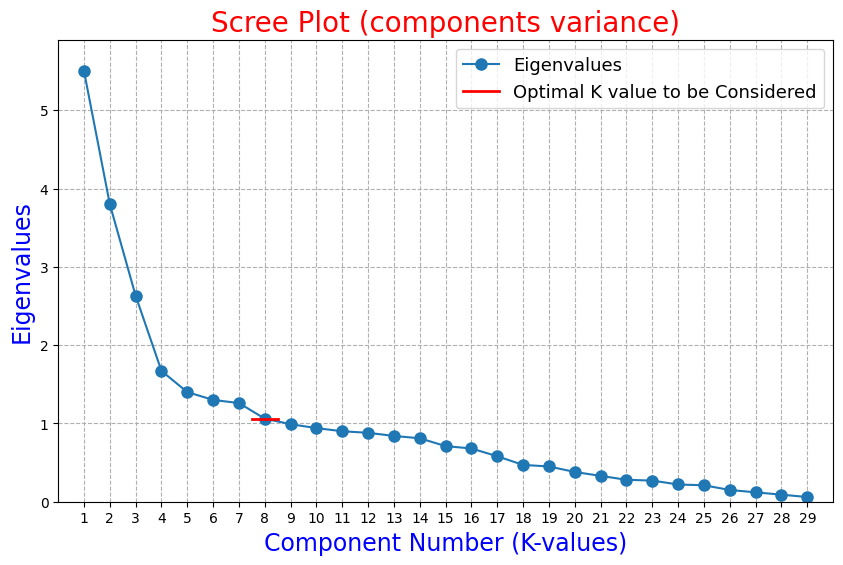

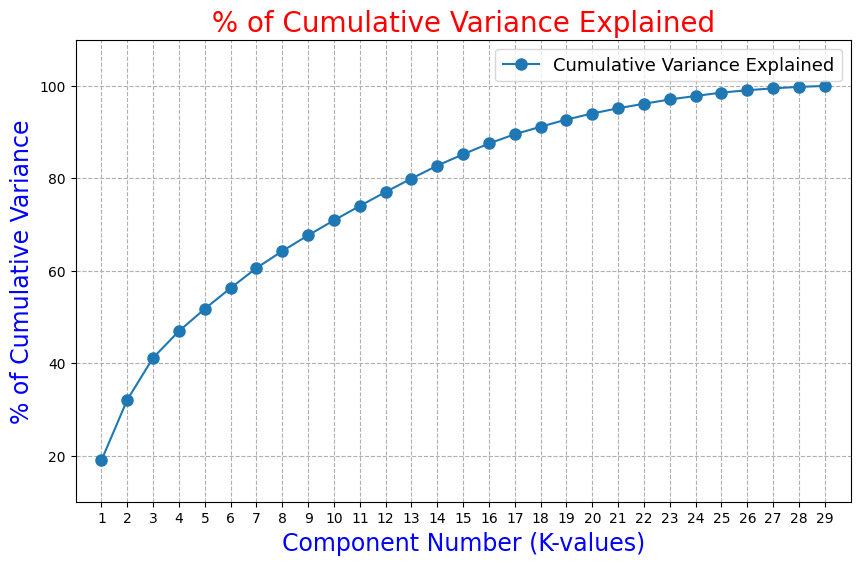

In [6]:
# Step-5 : Decide the value of "K"

# Method-1 : Kaiser’s Stopping Rule
# Choosing all PCs which Eigenvalues are larger than 1
best_eig_pairs = [sorted_eig_pairs[i][0] for i in range(
    0, len(sorted_eig_pairs)) if sorted_eig_pairs[i][0] > 1.0]
print("\nAccording to Kaiser's Stopping Rule :")
print("Number of PCs to be considered for PCA is : {}".format(
    str(len(best_eig_pairs))))
print("Their Eigenvalues are : {}".format(str(best_eig_pairs)))


# Method-2 : Scree Plot
fig = plt.figure(figsize=(10, 6))
plt.title("Scree Plot (components variance)", color='Red', fontsize=20)
plt.xticks(np.arange(1, 30, 1))
plt.xlim(0, 30)
plt.ylim(0, 5.9)
plt.ylabel("Eigenvalues", fontsize=17, color='blue')
plt.xlabel("Component Number (K-values)", fontsize=17, color='blue')
plt.grid(linestyle='--')
plt.plot(range(1, len(sorted_eigenValues) + 1), sorted_eigenValues, linestyle='-',
         label="Eigenvalues", marker='o', markersize=8)
plt.plot([7.5, 8.5], [1.055, 1.055], color='red', linestyle='-',
         lw=2, label="Optimal K value to be Considered")
plt.legend(loc=1, prop={'size': 13})
# plt.show()


# Method-3 : Cumulative Variance Plot
cumulative_variance = {}
ith_cumulative_variance = 0
for i in range(0, len(sorted_eig_pairs)):
    ith_explained_variance = sorted_eig_pairs[i][0]/sum(sorted_eigenValues)
    # print(ith_explained_variance)
    ith_cumulative_variance += ith_explained_variance
    cumulative_variance[str(i+1)] = round(ith_cumulative_variance*100, 2)

print("\nCumulative Variance Percentage : ")
for component, variance in cumulative_variance.items():
    print("Component {}: {}%".format(component, variance))

fig = plt.figure(figsize=(10, 6))
plt.title(" % of Cumulative Variance Explained ", color='Red', fontsize=20)
plt.xticks(np.arange(1, 30, 1))
plt.xlim(0, 30)
plt.ylim(10, 110)
plt.ylabel("% of Cumulative Variance", fontsize=17, color='blue')
plt.xlabel("Component Number (K-values)", fontsize=17, color='blue')
plt.grid(linestyle='--')
plt.plot(range(1, 30), sorted(list(cumulative_variance.values())[:30]), linestyle='-',
         label="Cumulative Variance Explained", marker='o', markersize=8)
plt.legend(loc=1, prop={'size': 13})
# plt.show()

In [7]:
# Step-6 : Projection matrix construction (K=8 from step- 1)
K = 15
projection_matrix = np.array(
    [list(np.hstack(i[1].reshape(29, 1))) for i in sorted_eig_pairs[:]])
projection_matrix = projection_matrix[:K]
print("\nProjection-Matrix Dimension ... ", projection_matrix.shape)
print(projection_matrix)


Projection-Matrix Dimension ...  (15, 29)
[[-5.86773740e-02 -2.85983479e-02  2.13159223e-01  1.85970898e-01
   2.93604180e-01  2.65838520e-01 -2.98564325e-01 -2.78964655e-01
  -1.16327353e-01 -3.78986131e-02  2.07830190e-03 -5.34760840e-02
   3.26565860e-01  1.31577098e-01  3.03520650e-01 -5.73499985e-02
  -1.39816415e-01 -1.47874006e-01 -2.25793870e-01 -1.50133710e-01
  -1.76822997e-01  4.33265558e-02 -6.66394435e-02 -6.02085618e-02
  -2.70492011e-03 -2.76478410e-01  3.29811302e-01 -1.04882881e-01
  -4.80238215e-02]
 [ 1.37781281e-01  1.70067287e-01  5.10453990e-02 -3.66284218e-01
  -2.97675927e-01 -3.19357245e-01 -2.30323966e-01 -9.21862392e-02
  -1.10380308e-03 -2.95255060e-02 -4.05883638e-02 -2.40639842e-02
   2.24274084e-02 -2.56617458e-01 -1.50587956e-01 -1.55659201e-01
  -3.51399918e-01  1.36245795e-01 -3.10984310e-01 -1.55788993e-01
  -4.63922644e-02 -8.85273497e-02  4.63799107e-02  3.08879765e-03
  -3.13086931e-01  3.24508617e-02  2.50692009e-01 -9.84775363e-02
  -4.20843545e

In [9]:
# Step-7 Projection Matrix as Dataframe
projection_matrix_df = pd.DataFrame(projection_matrix)
projection_matrix_df.columns = [str(i+1) for i in range(0, len(eig_vectors))]
projection_matrix_df = projection_matrix_df.set_index(
    [pd.Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'])])
variable_names = ['Under 5 years', '5 to 14 years', '65 years and over', "No certificate, diploma or degree", "Postsecondary certificate, diploma or degree", 'No high school diploma or equivalency certificate', 'Renter', 'One-maintainer household', 'Between 7 a.m. and 7:59 a.m.', 'African American', "South Asian, n.o.s.", "Black, n.o.s.", 'Chinese', 'Filipino', 'Total visible minority population',
                  'First Nations (North American Indian)', 'Average total income of household in 2020 ($)', 'Spending 30% or more of income on shelter costs only', 'Median value of dwellings ($)', 'Unemployed', 'Female employed', 'Male not in the labour force', 'All industries', '2000 or before', 'Public transit', 'Movers', 'Average number of rooms per dwelling', 'Major repairs needed', 'Fountains']
projection_matrix_df = pd.DataFrame(projection_matrix)
projection_matrix_df.columns = [str(i+1)
                                for i in range(projection_matrix.shape[1])]

# Rename the columns with variable names
projection_matrix_df.rename(columns=dict(
    zip(projection_matrix_df.columns, variable_names)), inplace=True)

# Assign the PC names to the index
projection_matrix_df.index = ['PC{}'.format(
    i+1) for i in range(projection_matrix_df.shape[0])]

# Print the DataFrame
display(projection_matrix_df)
results = []

for row_name, row in projection_matrix_df.iterrows():
    values = pd.to_numeric(row, errors='coerce')
    max_abs_value = values.abs().max()
    column_name = values.abs().idxmax()
    results.append((row_name, column_name, max_abs_value))
for result in results:
    row_name, column_name, max_abs_value = result
    print("Row name:", row_name)
    print("Column name:", column_name)
print()

,Under 5 years,5 to 14 years,65 years and over,"No certificate, diploma or degree","Postsecondary certificate, diploma or degree",No high school diploma or equivalency certificate,Renter,One-maintainer household,Between 7 a.m. and 7:59 a.m.,African American,...,Unemployed,Female employed,Male not in the labour force,All industries,2000 or before,Public transit,Movers,Average number of rooms per dwelling,Major repairs needed,Fountains
PC1,-0.058677,-0.028598,0.213159,0.185971,0.293604,0.265839,-0.298564,-0.278965,-0.116327,-0.037899,...,-0.150134,-0.176823,0.043327,-0.066639,-0.060209,-0.002705,-0.276478,0.329811,-0.104883,-0.048024
PC2,0.137781,0.170067,0.051045,-0.366284,-0.297676,-0.319357,-0.230324,-0.092186,-0.001104,-0.029526,...,-0.155789,-0.046392,-0.088527,0.046380,0.003089,-0.313087,0.032451,0.250692,-0.098478,-0.004208
PC3,0.002105,0.137148,-0.085264,-0.015356,-0.025055,-0.041730,-0.090033,-0.029938,-0.035419,-0.023361,...,0.421304,0.438645,0.416573,0.016597,-0.415826,0.001463,0.166163,0.019678,-0.231524,0.057470
PC4,0.143070,0.026863,0.300599,0.138122,0.072211,0.156974,-0.056010,0.210164,-0.012494,0.169231,...,0.151563,0.102294,0.352080,-0.135871,0.038894,-0.292434,-0.208158,0.010378,0.202133,0.180563
PC5,0.293981,0.145470,-0.208321,0.014105,-0.073811,-0.057562,-0.214355,-0.338181,0.248376,0.138298,...,0.103286,0.230029,-0.016634,0.262364,-0.040175,0.060940,-0.097144,0.138286,0.201184,-0.135245
PC6,0.004727,0.060726,0.339707,0.000890,-0.101189,0.017163,0.047555,0.178583,0.286037,-0.181048,...,0.055840,0.052543,0.267289,0.547375,0.362256,0.185625,-0.078562,0.109458,0.171698,-0.055878
PC7,0.072345,0.283051,-0.156793,0.169239,0.005272,0.076342,0.096387,0.141241,-0.167016,0.464025,...,-0.081682,-0.134475,-0.051158,0.270217,-0.072754,0.144498,0.239494,0.114435,0.075832,-0.220349
PC8,0.048443,-0.039749,0.084080,-0.018956,-0.036947,-0.028617,0.066163,0.007694,-0.109729,0.191899,...,-0.062353,-0.054011,-0.052590,0.202766,0.125938,0.120094,-0.045161,0.053750,0.020437,0.538957
PC9,0.308864,0.343878,-0.266315,0.117255,0.079989,0.076953,0.031714,0.020982,-0.136836,-0.351004,...,-0.046213,-0.089094,-0.121862,0.026728,-0.031167,0.019926,0.064570,0.029746,0.152592,0.098088
PC10,0.072975,-0.283739,-0.004391,-0.106203,-0.068739,-0.108324,0.036400,-0.087150,-0.669762,0.022470,...,0.165501,0.164599,0.090886,-0.049667,0.128756,0.208648,-0.000824,0.032772,0.350179,0.065537


Row name: PC1
Column name: Average number of rooms per dwelling
Row name: PC2
Column name: No certificate, diploma or degree
Row name: PC3
Column name: Female employed
Row name: PC4
Column name: First Nations (North American Indian)
Row name: PC5
Column name: Spending 30% or more of income on shelter costs only
Row name: PC6
Column name: All industries
Row name: PC7
Column name: African American
Row name: PC8
Column name: South Asian, n.o.s.
Row name: PC9
Column name: Black, n.o.s.
Row name: PC10
Column name: Between 7 a.m. and 7:59 a.m.
Row name: PC11
Column name: Under 5 years
Row name: PC12
Column name: Fountains
Row name: PC13
Column name: African American
Row name: PC14
Column name: 5 to 14 years
Row name: PC15
Column name: Between 7 a.m. and 7:59 a.m.

